In [125]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate , learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# from sklearn.metrics import plot_confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from yellowbrick.classifier import ConfusionMatrix
# from sklearn.metrics import plot_confusion_matrix , classification_report
from scikitplot.estimators import plot_learning_curve
import scikitplot as skplt
from yellowbrick.model_selection import LearningCurve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion


In [19]:
data = pd.read_csv('datadf.csv')
data

,Unnamed: 0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,0,2017,0,3,34,1,0,0,0
1,1,0,2013,2,1,28,0,0,3,1
2,2,0,2014,1,3,38,0,0,2,0
3,3,1,2016,0,3,27,1,0,5,1
4,4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
4648,4648,0,2013,0,3,26,0,0,4,0
4649,4649,1,2013,2,2,37,1,0,2,1
4650,4650,1,2018,1,3,27,1,0,5,1
4651,4651,0,2012,0,3,30,1,1,2,0


In [20]:
data.drop(['Unnamed: 0'], axis=1)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [21]:
data = data.drop(['Unnamed: 0'], axis=1)

In [22]:
X = data.drop(["LeaveOrNot"], axis=1)
y = data.LeaveOrNot

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size = 0.2)

In [24]:
X_train.shape

(3722, 8)

In [102]:
X_train

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
2850,1,2013,1,3,30,1,0,0
589,0,2012,0,3,25,1,0,3
2086,1,2017,2,2,29,1,0,2
445,1,2012,2,3,24,1,0,2
3654,1,2017,1,2,35,1,0,2
...,...,...,...,...,...,...,...,...
4426,0,2014,0,3,32,1,0,1
466,0,2013,0,3,26,1,1,4
3092,0,2016,0,3,39,0,0,1
3772,0,2015,0,3,41,1,0,1


In [25]:
y_train.shape

(3722,)

# Preprocessing_StandardScaler

In [26]:
preprocessing_StandardScaler = Pipeline(steps=[
    ("standardscaler", StandardScaler())])

In [27]:
# preprocessing_Min_Max_Scaler = Pipeline(steps=[
#     ("standardscaler", MinMaxScaler())])

# 1er Iteration-BaseLine-SMOTE_DummyClassifier

In [28]:
from sklearn.metrics import classification_report


In [29]:
# automatise le SMOTE
Dummy_smote = SMOTE( sampling_strategy='auto')

In [30]:
DummyPipeline = imbpipeline(steps=[["smote" , Dummy_smote],
                               ["classifier", DummyClassifier()]])

In [31]:
# fit sur le X et y train
DummyPipeline.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE()), ['classifier', DummyClassifier()]])

In [32]:
print("accuracy train : %.3f"%DummyPipeline.score(X_train , y_train))
print("accuracy test : %.3f"%DummyPipeline.score(X_test , y_test))

accuracy train : 0.656
accuracy test : 0.655


In [33]:
y_pred_DummyPipeline = DummyPipeline.predict(X_test) 

In [34]:
print(classification_report(y_test, y_pred_DummyPipeline))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       610
           1       0.00      0.00      0.00       321

    accuracy                           0.66       931
   macro avg       0.33      0.50      0.40       931
weighted avg       0.43      0.66      0.52       931



C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


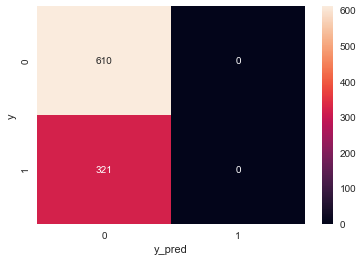

In [35]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_DummyPipeline)

# Learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

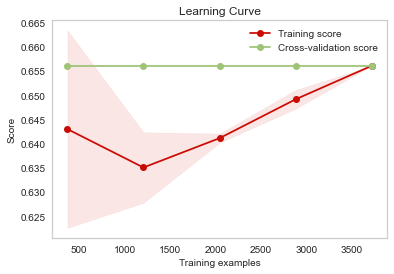

In [36]:
plot_learning_curve(DummyPipeline, X, y)

In [37]:
logreg_pipe = Pipeline([
 ('logreg', LogisticRegression(solver='saga'))])
logreg_pipe.fit(X_train,y_train)

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('logreg', LogisticRegression(solver='saga'))])

In [38]:
logreg_pipe = Pipeline([
 ('logreg', LogisticRegression(solver='saga'))])
logreg_pipe.fit(X_train,y_train)

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('logreg', LogisticRegression(solver='saga'))])

# ROC-AUC

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

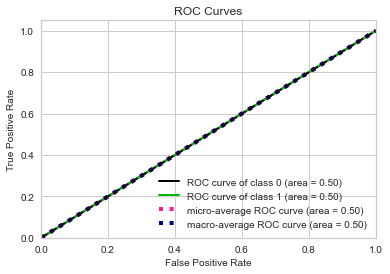

In [39]:
DummyPipeline.fit(X_train, y_train)
y_probas = DummyPipeline.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 2eme Iteration LogisiticRegression

In [40]:
LogicReg = Pipeline(steps=[["standardscaler" , preprocessing_StandardScaler],
                            ["classifier", LogisticRegression()]])

In [41]:
LogicReg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ['classifier', LogisticRegression()]])

In [42]:
print("accuracy train : %.3f"%LogicReg.score(X_train , y_train))
print("accuracy test : %.3f"%LogicReg.score(X_test , y_test))

accuracy train : 0.708
accuracy test : 0.711


In [43]:
y_pred_LogicReg = LogicReg.predict(X_test) 

In [44]:
print(classification_report(y_test, y_pred_LogicReg))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       610
           1       0.63      0.39      0.48       321

    accuracy                           0.71       931
   macro avg       0.68      0.64      0.64       931
weighted avg       0.70      0.71      0.69       931



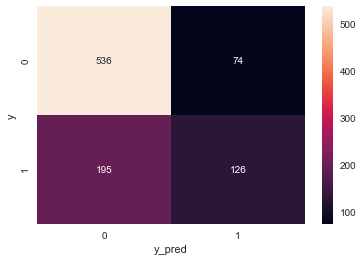

In [45]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_LogicReg)

# Learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

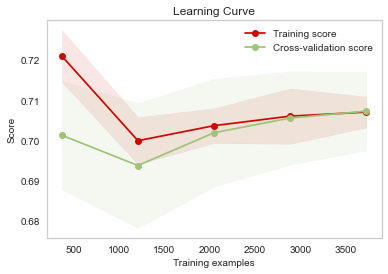

In [46]:
plot_learning_curve(LogicReg, X, y)

# ROC-AUC

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

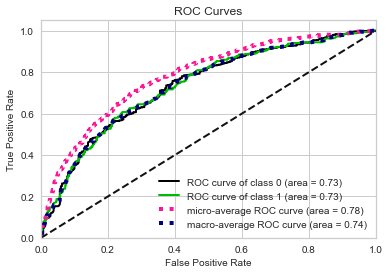

In [47]:
LogicReg.fit(X_train, y_train)
y_probas = LogicReg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

In [48]:
#Modele
LogicReg= Pipeline([
 ('logreg', LogisticRegression(solver='saga'))])
LogicReg.fit(X_train,y_train)

#Parameters
grid = {
    "logreg__C":[0.001, 0.01, 0.1, 1],
    "logreg__penalty":['l1','l2', 'elasticnet'],
    "logreg__max_iter":[100, 500, 1000]}
#GridSearchCV
LogicReg = GridSearchCV(logreg_pipe, grid, cv=5, verbose = 1)
#fit
LogicReg.fit(X_train,y_train)

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('logreg',
                                        LogisticRegression(solver='saga'))]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1],
                         'logreg__max_iter': [100, 500, 1000],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

# 3eme Iteration KNeighborsClassifier

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
KNC = Pipeline(steps=[["standardscaler" , preprocessing_StandardScaler],
                     ["classifier", KNeighborsClassifier()]])

In [64]:
# KNC = Pipeline(steps=[["standardscaler" , preprocessing_StandardScaler],
#                      ["classifier", KNeighborsClassifier(n_neighbors=30)]])

In [105]:
KNC.fit(X_train, y_train) 
with open('model_pkl2.pickle', 'wb') as files:
    pickle.dump(KNC, files)

In [66]:
print("accuracy train : %.3f"%KNC.score(X_train , y_train))
print("accuracy test : %.3f"%KNC.score(X_test , y_test))

accuracy train : 0.859
accuracy test : 0.830


In [67]:
y_pred_KNC = KNC.predict(X_test) 

In [68]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       610
           1       0.83      0.64      0.72       321

    accuracy                           0.83       931
   macro avg       0.83      0.78      0.80       931
weighted avg       0.83      0.83      0.82       931



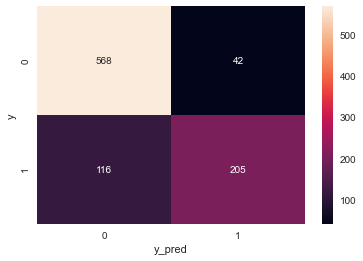

In [69]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# Learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

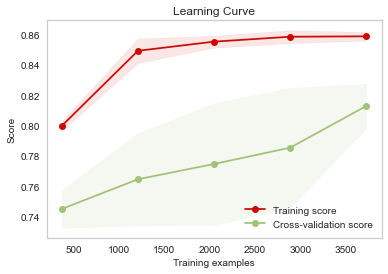

In [70]:
plot_learning_curve(KNC, X, y)

# ROC-AUC

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

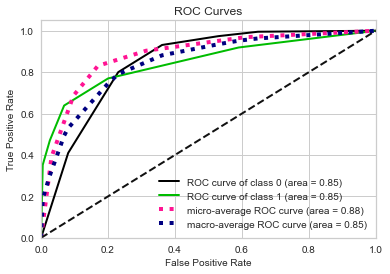

In [71]:
KNC.fit(X_train, y_train)
y_probas = KNC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

In [72]:
# model = KNC()
# search_grid={'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
#                                          13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
#                                          23, 24, 25, 26, 27, 28, 29, 30]}
# grid_search = GridSearchCV(estimator=pipeline,
#                             param_grid=svc_params,
#                             scoring='accuracy',
#                             cv=crossval, verbose=1,
#                             n_jobs=-1)
# grid_result = grid_search.fit(X_train, y_train)
# print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}’)

In [73]:
from sklearn.model_selection import GridSearchCV


In [74]:
Knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
# grid_search=grid.fit(x_train, y_train)

NameError: name 'knn' is not defined

In [ ]:
KNC = KNeighborsClassifier()
search_grid={'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]}
grid_search= GridSearchCV(estimator=KNC, 
                          param_grid=search_grid,
                          scoring='recall',cv=5)
grid_result = grid_search.fit(X_train, y_train)
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')


In [75]:
parameters = {'n_neighbors': list(range(1,31))}


In [76]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, parameters, verbose=2, return_train_score=True)

In [77]:
grid.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................

[CV] END .....................................n_neighbors=21; total time=   0.0s
[CV] END .....................................n_neighbors=21; total time=   0.0s
[CV] END .....................................n_neighbors=21; total time=   0.0s
[CV] END .....................................n_neighbors=21; total time=   0.0s
[CV] END .....................................n_neighbors=22; total time=   0.0s
[CV] END .....................................n_neighbors=22; total time=   0.0s
[CV] END .....................................n_neighbors=22; total time=   0.0s
[CV] END .....................................n_neighbors=22; total time=   0.0s
[CV] END .....................................n_neighbors=22; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             return_train_score=True, verbose=2)

In [78]:
# GridSearchCV(estimator=KNeighborsClassifier(),
#              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
#                                          13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
#                                          23, 24, 25, 26, 27, 28, 29, 30]},
#              return_train_score=True, verbose=2)

In [79]:
# GridSearchCV(cv=None, error_score='raise',
#        estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
#           weights='uniform'),
#        fit_params=None, iid=True, n_jobs=1,
#        param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
#        scoring=None, verbose=2)

# 4eme Iteration- DecisionTree

In [ ]:
DeT = Pipeline(steps=[["standardscaler" , preprocessing_StandardScaler],
                     ["classifier", DecisionTreeClassifier()]])

In [ ]:
DeT.fit(X_train, y_train)

In [ ]:
print("accuracy train : %.3f"%DeT.score(X_train , y_train))
print("accuracy test : %.3f"%DeT.score(X_test , y_test))

In [ ]:
y_pred_DeT = DeT.predict(X_test) 

In [ ]:
print(classification_report(y_test, y_pred_DeT))

In [ ]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_DeT)

# Learning-Curve

In [ ]:
plot_learning_curve(DeT, X, y)

# ROC-AUC

In [ ]:
DeT.fit(X_train, y_train)
y_probas = DeT.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 5eme Iteration-Bagging(RandomForestClassifier)

In [ ]:
RFC = Pipeline(steps=[["standardscaler" , preprocessing_StandardScaler],
                        ["classifier", RandomForestClassifier()]])
#  ["min_max_scaler", preprocessing_Min_Max_Scaler],

In [ ]:
RFC.fit(X_train, y_train)

In [ ]:
print("accuracy train : %.3f"%RFC.score(X_train , y_train))
print("accuracy test : %.3f"%RFC.score(X_test , y_test))

In [ ]:
y_pred_RFC = RFC.predict(X_test) 

In [ ]:
print(classification_report(y_test, y_pred_RFC))

In [ ]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_RFC)

# Learning-Curve

In [ ]:
plot_learning_curve(RFC, X, y)

# ROC-AUC

In [80]:
RFC.fit(X_train, y_train)
y_probas = RFC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

NameError: name 'RFC' is not defined

In [81]:
RFC=RandomForestClassifier(random_state=42)


In [82]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [83]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

NameError: name 'rfc' is not defined

In [84]:
CV_rfc.best_params_

NameError: name 'CV_rfc' is not defined

In [85]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [86]:
rfc1.fit(x_train, y_train)


NameError: name 'x_train' is not defined

In [87]:
pred=rfc1.predict(x_test)

NameError: name 'x_test' is not defined

# 6eme Iteration-Boosting(GradientBoostingClassifier)

In [88]:
GBC = Pipeline(steps=[["standardscaler" , preprocessing_StandardScaler],
                            ["classifier", GradientBoostingClassifier()]])

In [89]:
GBC.fit(X_train, y_train)

Pipeline(steps=[('standardscaler',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ['classifier', GradientBoostingClassifier()]])

In [90]:
print("accuracy train : %.3f"%GBC.score(X_train , y_train))
print("accuracy test : %.3f"%GBC.score(X_test , y_test))

accuracy train : 0.848
accuracy test : 0.860


In [91]:
y_pred_GBC = GBC.predict(X_test) 

In [92]:
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       610
           1       0.88      0.69      0.77       321

    accuracy                           0.86       931
   macro avg       0.87      0.82      0.84       931
weighted avg       0.86      0.86      0.86       931



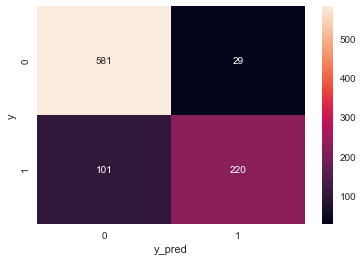

In [93]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_GBC)

# Learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

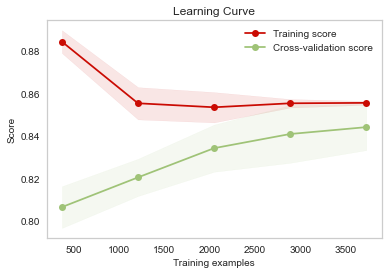

In [94]:
plot_learning_curve(GBC, X, y)

# ROC-AUC

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

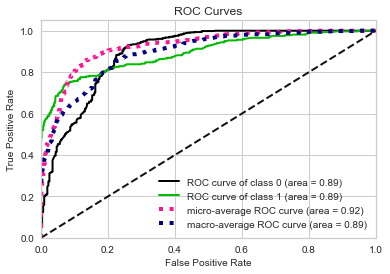

In [95]:
GBC.fit(X_train, y_train)
y_probas = GBC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# STACKING

In [96]:
ML_stacking = StackingClassifier([
                                    ("KN" , KNC)])
ML_stacking.fit(X_test , y_test)
y_pred_stack = ML_stacking.predict(X_test)

In [97]:
import pickle

# Enregsiter le modele

In [103]:
file = './model_pkl.pickle.pkl'

with open('model_pkl.pickle', 'wb') as files:
    pickle.dump(KNC, files)

In [104]:
# enregistrer le modèle
pickle.dump(KNC,open('model.pkl','wb'))

# PICKLE

In [100]:
with open("model_pkl.pickle", "wb") as file:
    pickle.dump(KNC, file)